In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os 
import sys
sys.path.append(os.path.abspath('..'))

In [3]:
from src.model_training import SplitData, TrainData, EvaluateModel
from src.plot_metrcis import PlotMetrics
from src.data_processing import DataProcessing

In [4]:
df = pd.read_csv('C:/Users/Temp/Desktop/KAI-Projects/Insurance-Risk-Car-Insurance-Risk-Modeling/data/cleaned_data2.csv')

C:\Users\Temp\AppData\Local\Temp\ipykernel_2108\524883252.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/Temp/Desktop/KAI-Projects/Insurance-Risk-Car-Insurance-Risk-Modeling/data/cleaned_data2.csv')


In [5]:
df = df.drop_duplicates(keep='first')

In [6]:
df = df.drop('CapitalOutstanding', axis=1)

In [7]:
dp = DataProcessing(df)
dp.show_correlation_matrix(['TotalClaims','TotalPremium'])

,TotalClaims,TotalPremium
UnderwrittenCoverID,0.002974,0.095094
PolicyID,0.002997,0.087902
PostalCode,-0.000016,0.004291
RegistrationYear,0.004961,0.081995
Cylinders,0.000043,0.006822
cubiccapacity,0.001229,0.042570
kilowatts,0.003100,0.035045
SumInsured,-0.006944,-0.082742
CalculatedPremiumPerTerm,0.070381,0.742182
TotalPremium,0.088302,1.000000


In [8]:
labeled_df = dp.encode_data()
labeled_df

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Bank,AccountType,Province,PostalCode,...,CalculatedPremiumPerTerm,ExcessSelected,CoverType,CoverGroup,Section,Product,StatutoryClass,TotalPremium,TotalClaims,Gender-2
0,145249,12827,17,1,0,0,2,0,2,1459,...,25.0000,10,21,5,1,2,0,21.929825,0.0,1
1,145249,12827,19,1,0,0,2,0,2,1459,...,25.0000,10,21,5,1,2,0,21.929825,0.0,1
2,145249,12827,21,1,0,0,2,0,2,1459,...,25.0000,10,21,5,1,2,0,0.000000,0.0,1
3,145255,12827,19,1,0,0,2,0,2,1459,...,584.6468,1,13,5,1,2,0,512.848070,0.0,1
4,145255,12827,21,1,0,0,2,0,2,1459,...,584.6468,1,13,5,1,2,0,0.000000,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999539,31520,389,18,0,3,1,0,1,8,7493,...,395.8481,12,18,5,1,1,0,347.235175,0.0,1
999540,31520,389,20,0,3,1,0,1,8,7493,...,395.8481,12,18,5,1,1,0,347.235175,0.0,1
999541,31520,389,22,0,3,1,0,1,8,7493,...,395.8481,12,18,5,1,1,0,347.235175,0.0,1
999542,31519,389,9,0,3,1,0,1,8,7493,...,2.6391,12,14,5,1,1,0,2.315000,0.0,1


In [9]:
standardize_df = dp.standardize_data(labeled_df)
standardize_df

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Bank,AccountType,Province,PostalCode,...,CalculatedPremiumPerTerm,ExcessSelected,CoverType,CoverGroup,Section,Product,StatutoryClass,TotalPremium,TotalClaims,Gender-2
0,0.638956,0.920816,0.012121,14.070490,-0.341890,-2.05703,-0.634192,-0.752584,-0.810675,-0.589052,...,-0.413289,-0.517726,1.608890,-0.034188,-0.343806,3.252517,0.0,-0.251225,-0.027154,0.267069
1,0.638956,0.920816,0.515914,14.070490,-0.341890,-2.05703,-0.634192,-0.752584,-0.810675,-0.589052,...,-0.413289,-0.517726,1.608890,-0.034188,-0.343806,3.252517,0.0,-0.251225,-0.027154,0.267069
2,0.638956,0.920816,1.019707,14.070490,-0.341890,-2.05703,-0.634192,-0.752584,-0.810675,-0.589052,...,-0.413289,-0.517726,1.608890,-0.034188,-0.343806,3.252517,0.0,-0.390888,-0.027154,0.267069
3,0.639050,0.920816,0.515914,14.070490,-0.341890,-2.05703,-0.634192,-0.752584,-0.810675,-0.589052,...,2.123873,-4.764649,0.159515,-0.034188,-0.343806,3.252517,0.0,2.875266,-0.027154,0.267069
4,0.639050,0.920816,1.019707,14.070490,-0.341890,-2.05703,-0.634192,-0.752584,-0.810675,-0.589052,...,2.123873,-4.764649,0.159515,-0.034188,-0.343806,3.252517,0.0,-0.390888,-0.027154,0.267069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999539,-1.157740,-1.430362,0.264018,-0.071071,4.528507,-0.29879,-1.142170,1.272190,1.699643,1.688608,...,1.267953,0.426035,1.065374,-0.034188,-0.343806,-0.263374,0.0,1.820534,-0.027154,0.267069
999540,-1.157740,-1.430362,0.767810,-0.071071,4.528507,-0.29879,-1.142170,1.272190,1.699643,1.688608,...,1.267953,0.426035,1.065374,-0.034188,-0.343806,-0.263374,0.0,1.820534,-0.027154,0.267069
999541,-1.157740,-1.430362,1.271603,-0.071071,4.528507,-0.29879,-1.142170,1.272190,1.699643,1.688608,...,1.267953,0.426035,1.065374,-0.034188,-0.343806,-0.263374,0.0,1.820534,-0.027154,0.267069
999542,-1.157755,-1.430362,-2.003050,-0.071071,4.528507,-0.29879,-1.142170,1.272190,1.699643,1.688608,...,-0.514662,0.426035,0.340687,-0.034188,-0.343806,-0.263374,0.0,-0.376145,-0.027154,0.267069


In [12]:
standardize_df.to_csv('C:/Users/Temp/Desktop/KAI-Projects/Insurance-Risk-Car-Insurance-Risk-Modeling/data/standrard_data.csv')

Now start straining the dataset by first splitting it into training and tesing set

In [10]:
x = standardize_df.drop('TotalPremium', axis=1)
y = standardize_df['TotalPremium']


In [11]:
sp = SplitData(x, y)

x_train, x_test, y_train, y_test = sp.split_data()


training the linear regression model

In [12]:
td = TrainData(x_train, y_train)
linear_model = td.linear_regression()


training the DesicionTreeRegressor model

In [13]:
decision_tree_model = td.decision_tree_regressor()

training the XGBOOST algorithm 

In [14]:
xg_model = td.xgboost()

training the Random forest regressor on the data

In [15]:
random_forest_model = td.random_forest()

evaluating the accuracy of the model with mean absolute error, mean squared error, and r2-scores


In [16]:
eval = EvaluateModel()
mae_scores, mse_scores, r2_scores = [], [], []
models = ['linea_regression', 'Decision_tree', 'RandomForest', 'XGBOOST']

for model in [linear_model, decision_tree_model, random_forest_model, xg_model]:
    mae, mse, r2, _ = eval.evaluate_model(model, x_test, y_test)
    mae_scores.append(mae)
    mse_scores.append(mse)
    r2_scores.append(r2)


for i, model_name in enumerate(models):
    print(f'Evaluate result for {model_name}: ')
    print(f'      Mean absolute error (MAE): {mae_scores[i]} ')
    print(f'      Mean Squared  error (MSE): {mse_scores[i]} ')
    print(f'      r2_score  {r2_scores[i]}')







Evaluate result for linea_regression: 
      Mean absolute error (MAE): 0.3212621391119383 
      Mean Squared  error (MSE): 0.4489223534711833 
      r2_score  0.5548351882420728
Evaluate result for Decision_tree: 
      Mean absolute error (MAE): 0.03225114054241849 
      Mean Squared  error (MSE): 0.08913366002169136 
      r2_score  0.9116124009463067
Evaluate result for RandomForest: 
      Mean absolute error (MAE): 0.04760589466903828 
      Mean Squared  error (MSE): 0.05160316521635005 
      r2_score  0.9488287603590578
Evaluate result for XGBOOST: 
      Mean absolute error (MAE): 0.22023316096722725 
      Mean Squared  error (MSE): 0.254623519774851 
      r2_score  0.7475077140328046


Plotting the accuracy of all model for comparison puprose

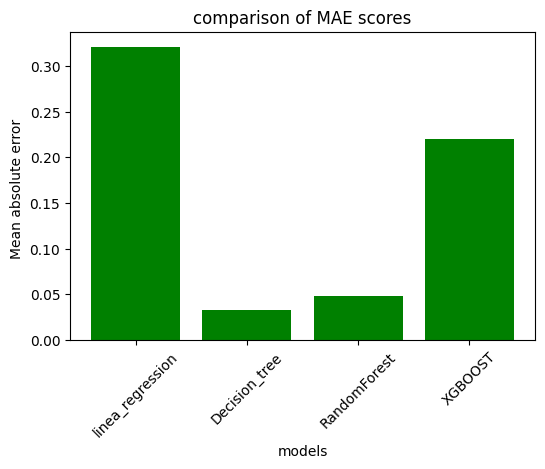

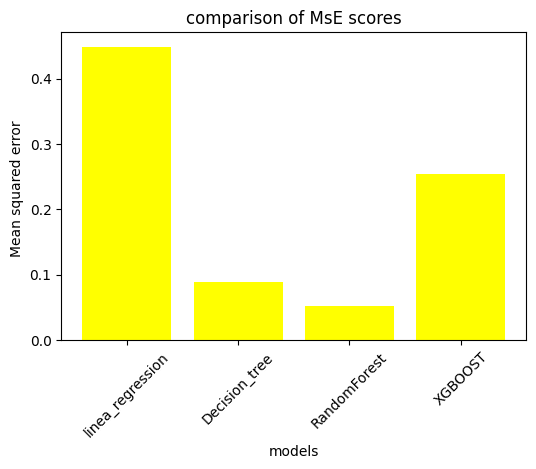

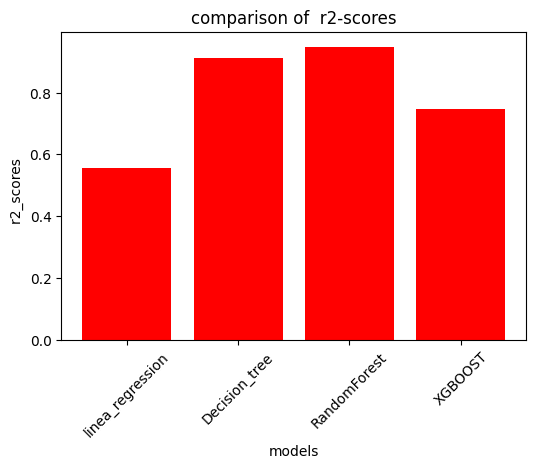

In [17]:
plot = PlotMetrics(models,mae_scores, mse_scores, r2_scores)

plot.plot()

plotting Feature importance 

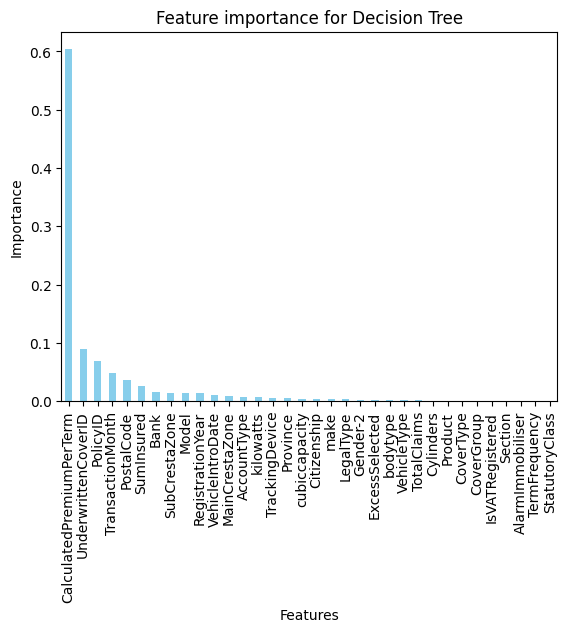

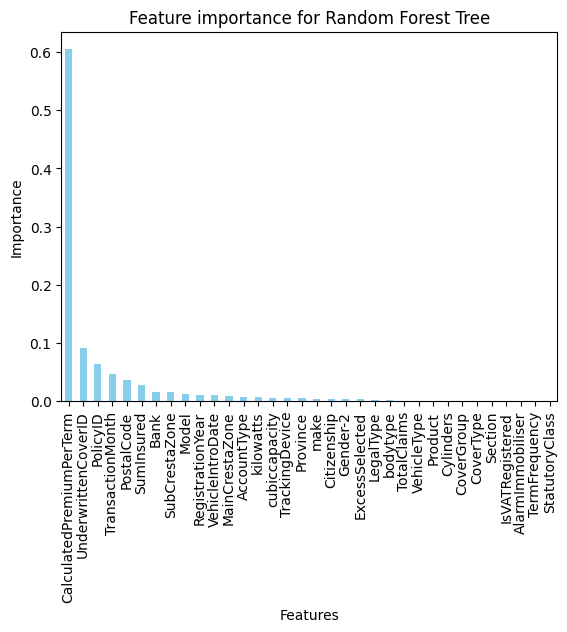

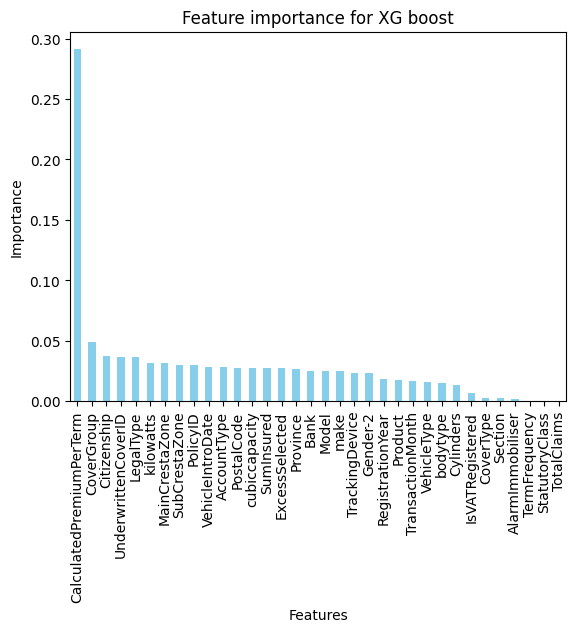

In [22]:
def plot_feature_importance(model, feature_names, model_name):
    feature_importance =pd.DataFrame(model.feature_importances_, index = feature_names, columns = ["Importance"])
    feature_importance = feature_importance.sort_values(by = "Importance", ascending=False)

    plt.Figure(figsize=(20,36))
    feature_importance.plot(kind='bar', legend=False, color = 'skyblue')
    plt.title(f'Feature importance for {model_name}')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.xticks(rotation = 90)
    plt.show()


plot_feature_importance(decision_tree_model, x_train.columns, "Decision Tree")
plot_feature_importance(random_forest_model, x_train.columns, "Random Forest Tree")
plot_feature_importance(xg_model, x_train.columns, "XG boost")